<Axes: >

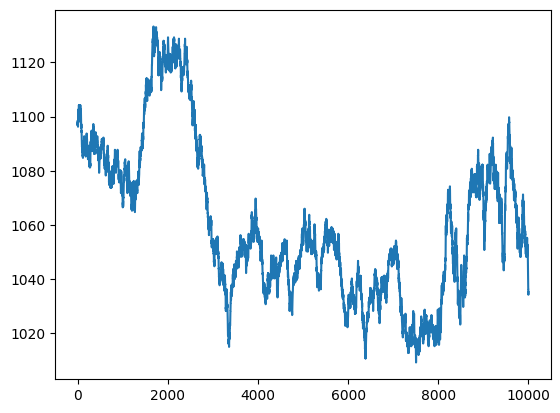

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('d3.csv', sep=';')
df = df.reset_index(drop=True)
df = df.drop('timestamp', axis=1)

df['ORCHIDS'].plot()

0       NaN
1       NaN
2       NaN
3   -0.0003
4    0.0002
5   -0.0002
6    0.0004
7   -0.0002
8   -0.0001
9    0.0000
Name: SUNLIGHT, dtype: float64


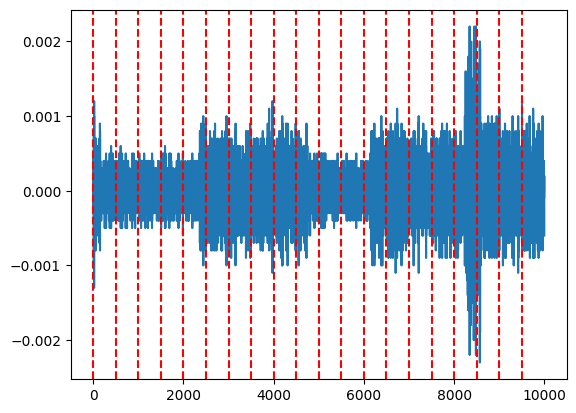

In [138]:
df['SUNLIGHT'].diff().diff().diff().plot()
print(df['SUNLIGHT'].diff().diff().diff()[:10])
for i in range(20):
    plt.axvline(i*500, color='r', linestyle='--')

<Axes: >

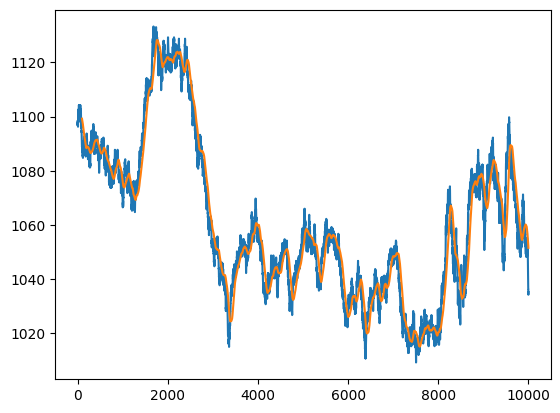

In [139]:
effect = []
for i in range(0, len(df)):
    if df['HUMIDITY'][i] <= 80 and df['HUMIDITY'][i] >= 60:
        effect.append(1)
    elif df['HUMIDITY'][i] < 60:
        effect.append(0.98 ** ((60 - df['HUMIDITY'][i]) / 5))
    else:
        effect.append(0.98 ** ((df['HUMIDITY'][i] - 80) / 5))
        
for i in range(0, len(df)):
    effect[i] = 1/effect[i]
    
df['EFFECT'] = effect

# (df['EFFECT']*1000 + 200).shift(500).plot()  
# df['ORCHIDS'].plot()

needed = 2500 * 7/12 * 10000
ten = 2500 * 7/72 * 10000
su = 0

lis = []
for i in range(len(df)):
    su += df['SUNLIGHT'][i]
    if su < needed:
        diff = needed - su
        diff /= ten
        diff = 0.96 ** diff
    else:
        diff = 1
    lis.append(1 - diff)

df['e2'] = lis

df['ORCHIDS'].plot()
df['ORCHIDS'].rolling(100).mean().plot()

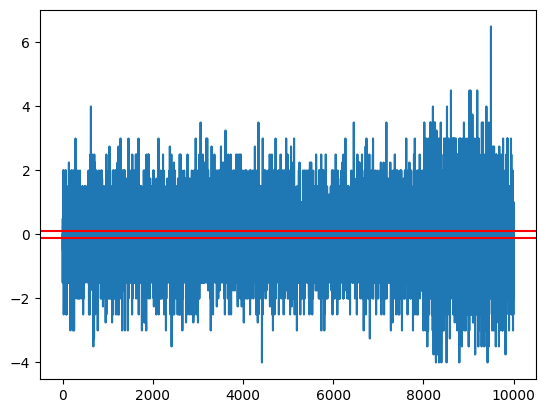

In [140]:
df['ORCHIDS'].diff().plot()
plt.axhline(y=0.1, color='r', linestyle='-')
plt.axhline(y=-0.1, color='r', linestyle='-')

(array([2.500e+01, 6.200e+01, 1.370e+02, 3.010e+02, 6.720e+02, 1.159e+03,
        1.005e+03, 2.504e+03, 1.615e+03, 1.224e+03, 8.080e+02, 2.990e+02,
        1.090e+02, 5.600e+01, 1.500e+01, 4.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-4.   , -3.475, -2.95 , -2.425, -1.9  , -1.375, -0.85 , -0.325,
         0.2  ,  0.725,  1.25 ,  1.775,  2.3  ,  2.825,  3.35 ,  3.875,
         4.4  ,  4.925,  5.45 ,  5.975,  6.5  ]),
 <BarContainer object of 20 artists>)

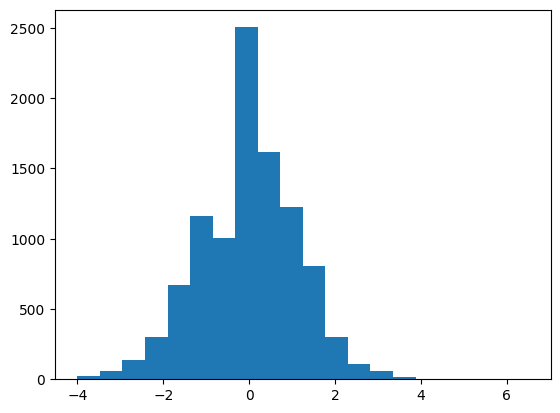

In [141]:
# histogram
plt.hist(df['ORCHIDS'].diff(), bins=20)

<Axes: >

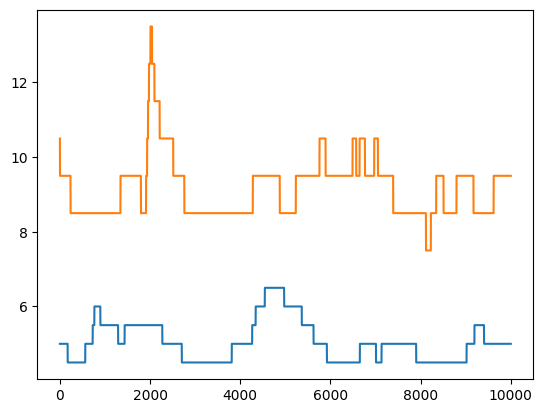

In [142]:
(-df['IMPORT_TARIFF']).plot()
df['EXPORT_TARIFF'].plot()

In [143]:
# plot % change in export tariff
df['EXPORT_TARIFF'] = df['EXPORT_TARIFF'].pct_change() + 1
df['EXPORT_TARIFF'] = df['EXPORT_TARIFF'].cumprod()

<Axes: >

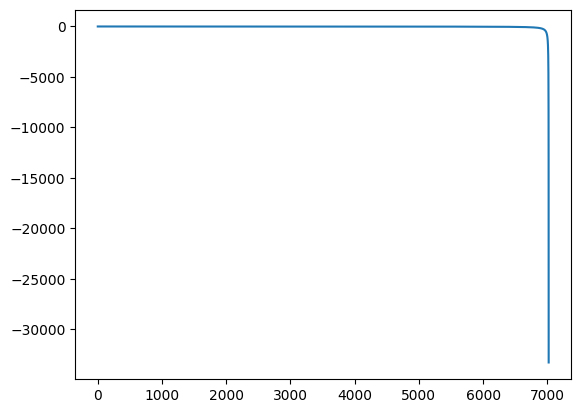

In [144]:
# if supply effect is additive:
df['EFFECT'] = 1/(1 - df['EFFECT'] - df['e2'])

#if supply effect is multiplicative:
#df['EFFECT'] = 1/((1 - df['EFFECT']) * (1 - df['e2']))

#df['EFFECT'] = df['EFFECT'] * df['EXPORT_TARIFF']
df['EFFECT'].plot()